In [13]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pylab
from scipy import ndimage

In [14]:
def conversion(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

     # Add image number to the image
    image_number = os.path.splitext(image_filename)[0].split('_')[-1]
    cv2.putText(image, f"Image {image_number}", (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    #cv2.imwrite(os.path.splitext(image_path)[0] + '_gray_image.png', gray_image)
    cv2.imshow('color_image', image)
    cv2.imshow('gray_image', gray_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [15]:
def gaussian(image_path):
    image = cv2.imread(image_path)
    cv2.getGaussianKernel(9, 9)
    blur = cv2.GaussianBlur(image, (5, 5), 0)
    #cv2.imwrite(os.path.splitext(image_path)[0] + '_blur.png', blur)
    cv2.imshow('blur', blur)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [16]:
def averagefilter(image_path):
    image = cv2.imread(image_path)
    kernel = np.ones((5, 5), np.float32) / 25
    dst = cv2.filter2D(image, -1, kernel)
    plt.subplot(121), plt.imshow(image), plt.title('blur')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(dst), plt.title('averaged')
    plt.xticks([]), plt.yticks([])
    plt.show()
    #cv2.imwrite(os.path.splitext(image_path)[0] + '_averaged.png', dst)


In [17]:
def segmentation(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    #cv2.imwrite(os.path.splitext(image_path)[0] + '_thresh_image.jpg', thresh)
    cv2.imshow('thresh_image', thresh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # noise removal
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    cv2.imshow('opening', thresh)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    cv2.imshow('sure_bg', sure_bg)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("No. of pests in the image: ")
    labelarray, particle_count = ndimage.measurements.label(sure_bg)
    print(particle_count)


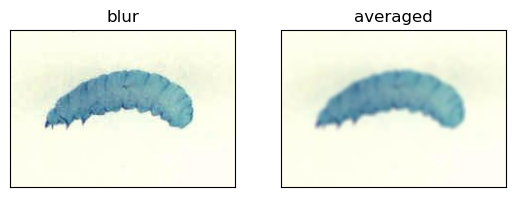

No. of pests in the image: 
1


C:\Users\moonr\AppData\Local\Temp\ipykernel_19600\2091510540.py:23: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  labelarray, particle_count = ndimage.measurements.label(sure_bg)


In [18]:
if __name__ == "__main__":
    image_folder_path = r"C:\Users\moonr\Desktop\est"

    for image_filename in os.listdir(image_folder_path):
        image_path = os.path.join(image_folder_path, image_filename)
        conversion(image_path)
        gaussian(image_path)
        averagefilter(image_path)
        segmentation(image_path)